In [152]:
from __future__ import print_function
import time
import intrinio_sdk
from intrinio_sdk.rest import ApiException
from pprint import pprint
from datetime import date
from datetime import timedelta
import io
from collections import Counter
import numpy as np
from numpy import genfromtxt
import matplotlib.pyplot as plt
import pandas as pd

import requests, lxml
from lxml import html

In [162]:
data = pd.read_csv("https://query1.finance.yahoo.com/v7/finance/download/AAPL?period1=1546502400&period2=1587279600&interval=1d&events=history")

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-03,143.979996,145.720001,142.000000,142.190002,139.753540,91312200
1,2019-01-04,144.529999,148.550003,143.800003,148.259995,145.719513,58607100
2,2019-01-07,148.699997,148.830002,145.899994,147.929993,145.395203,54777800
3,2019-01-08,149.559998,151.820007,148.520004,150.750000,148.166870,41025300
4,2019-01-09,151.289993,154.529999,149.630005,153.309998,150.682983,45099100
...,...,...,...,...,...,...,...
320,2020-04-13,268.309998,273.700012,265.829987,273.250000,273.250000,32755700
321,2020-04-14,280.000000,288.250000,278.049988,287.049988,287.049988,48748700
322,2020-04-15,282.399994,286.329987,280.630005,284.429993,284.429993,32788600
323,2020-04-16,287.380005,288.200012,282.350006,286.690002,286.690002,38845800


In [196]:
class Stock_Yahoo:
    def __init__(self, ticker, start_date=date.today(), end_date=date.today(), frequency='daily', page_size=100):        
        self.ticker = ticker
        self.start_date = start_date
        self.end_date = end_date
        self.frequency = frequency
        self.data = self.get_clean_yahoo(ticker, start_date, end_date)
        self.date_range_iter = self.daterange(start_date, end_date)
        self.prices = self.data['Adj Close'].astype(float).tolist()
        self.start_price = self.prices[0]
        self.end_price = self.prices[-1]
        
    def get_clean_yahoo(self, ticker, start_date, end_date):
        start_date = int(time.mktime(start_date.timetuple()))
        end_date = int(time.mktime(end_date.timetuple()))
        yahoo_url = "https://query1.finance.yahoo.com/v7/finance/download/"+ ticker + "?period1=" + str(start) + "&period2=" + str(end) + "&interval=1d&events=history"
        data = pd.read_csv(yahoo_url)
        # sort in ascending date
        data = data.reindex(index=data.index[::-1])
        return data
    
    def display_close_price(self):
        plt.figure(figsize=(10,7))
        plt.title(self.ticker + " Stock Price")
        plt.plot(self.data['Date'].astype('datetime64'), self.prices)
        plt.xlabel("Date")
        plt.ylabel("Price")
        plt.show()
        
    def get_performance(self, start=None, end=None):
        if (start == None):
            start = self.start_date
        if (end == None):
            end = self.end_date
        
        max_ind = len(self.prices)
        curr_ind = 0
        gains = []

        for date in self.daterange(start, end):
            if ((date - self.start_date).total_seconds() < 0):
                gains.append(0)
            elif ((self.end_date - date).total_seconds() < 0):
                gains.append(0)
            elif (curr_ind >= max_ind):
                gains.append(0)
            else:
                gains.append(self.prices[curr_ind]['adj_close'] - self.start_price)
                curr_ind += 1
        return np.array(gains)
    
    def daterange(self, start_date, end_date):
        delta = timedelta(days=1)
        while start_date <= end_date:
            if (start_date.weekday() >= 5):
                start_date += delta
                continue
            yield start_date
            start_date += delta      
    
    
        

In [183]:
# class Stock:
#     def __init__(self, ticker, start_date=date.today(), end_date=date.today(), frequency='daily', page_size=100):
#         intrinio_sdk.ApiClient().configuration.api_key['api_key'] = 'OmEzMWY4NDEzMzRlOGM3Y2ZjNmY3ZjAwZWRmZWI2MTIy'
        
#         self.ticker = ticker
#         self.start_date = start_date
#         self.end_date = end_date
#         self.frequency = frequency
#         self.security_api = intrinio_sdk.SecurityApi()
#         self.api_response = self.security_api.get_security_stock_prices(
#             ticker, start_date=start_date, end_date=end_date, 
#             frequency=frequency, page_size=int((end_date - start_date).days), next_page='')
#         self.date_range_iter = self.daterange(start_date, end_date)
#         self.prices = self.api_response.stock_prices_dict
#         self.start_price = self.api_response.stock_prices_dict[0]['adj_close']
#         self.end_price = self.api_response.stock_prices_dict[-1]['adj_close']
    
#     def display_close_price(self):
#         plt.title(self.ticker + " Stock Price")
#         close_prices = []
#         date = []
#         #### CHANGED ####
#         prices_df = pd.DataFrame(self.prices)
#         close_prices = prices_df['adj_close']
#         date = prices_df['date']
#         #### CHANGED ####
#         plt.plot(date, close_prices)
#         plt.xlabel("Date")
#         plt.ylabel("Price")
#         plt.show()
# #         #TODO: add start and end date arguments 
    
#     def get_stock_price_dict(self):
#         return self.api_response.stock_prices_dict
    
#     def get_api_response(self):
#         return self.api_response
    
# #     def start_price(self):
# #         return self.api_response.stock_prices_dict[0]['close']
    
# #     def end_price(self):
# #         return self.api_response.stock_prices_dict[-1]['close']
    
#     def get_performance(self, start=None, end=None):
#         if (start == None):
#             start = self.start_date
#         if (end == None):
#             end = self.end_date
        
#         max_ind = len(self.prices)
#         curr_ind = 0
#         gains = []

#         for date in self.daterange(start, end):
#             if ((date - self.start_date).total_seconds() < 0):
#                 gains.append(0)
#             elif ((self.end_date - date).total_seconds() < 0):
#                 gains.append(0)
#             elif (curr_ind >= max_ind):
#                 gains.append(0)
#             else:
#                 gains.append(self.prices[curr_ind]['adj_close'] - self.start_price)
#                 curr_ind += 1
#         return np.array(gains)
    
#     def daterange(self, start_date, end_date):
#         delta = timedelta(days=1)
#         while start_date <= end_date:
#             if (start_date.weekday() >= 5):
#                 start_date += delta
#                 continue
#             yield start_date
#             start_date += delta
    
    
class Portfolio:
    def __init__(self, capital=1000):
        self.capital = float(capital)
        self.holdings = {}
        
    def buy(self, ticker='', start=date.today(), end=date.today()):
        newStock = Stock_Yahoo(ticker, start_date=start, end_date=end)
        self.holdings[newStock] = (start, end)
    
    def display_performance(self):
        min_date = min(self.holdings.values(), key = lambda x: x[0])[0]
        max_date = max(self.holdings.values(), key = lambda x: x[1])[1]
        
        perf = np.array([self.capital] * len(list(self.daterange(min_date, max_date))))
        for i in self.holdings:
            perf += i.get_performance(start=min_date, end=max_date)
        
        plt.title("Portfolio Performance")
        plt.plot(list(self.daterange(min_date, max_date)), perf)
        plt.xlabel("Date")
        plt.ylabel("$")
        plt.show()
        #some of the logic is wrong, so that if two stocks are seperated, then jumps to 1000 which is not right
    
    def daterange(self, start_date, end_date):
        delta = timedelta(days=1)
        while start_date <= end_date:
            if (start_date.weekday() >= 5):
                start_date += delta
                continue
            yield start_date
            start_date += delta

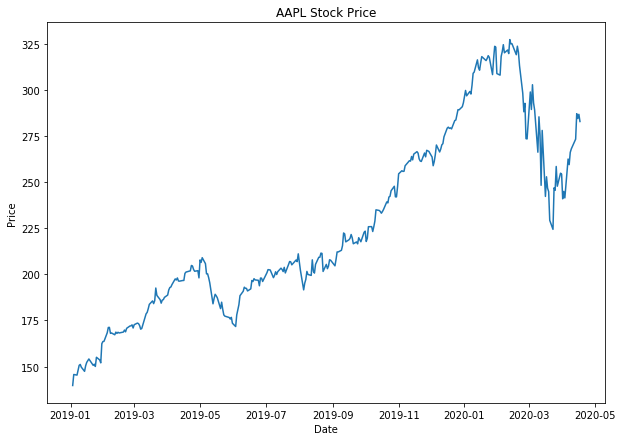

TypeError: 'float' object is not subscriptable

In [197]:
appl2 = Stock_Yahoo(ticker="AAPL", start_date=date(2019, 1, 3), end_date=date.today())
appl2.display_close_price()
print(appl.get_performance())


In [184]:
testport = Portfolio()
testport.buy('AAPL', start=date(2020, 1, 3))
testport.buy('MSFT', start=date(2019, 4, 20))
testport.display_performance()

TypeError: unsupported operand type(s) for -: 'datetime.date' and 'int'